# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
!kaggle competitions download -c nyc-taxi-trip-duration

nyc-taxi-trip-duration.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# !unzip nyc-taxi-trip-duration.zip
# !unzip train.zip
# !rm test.zip
# !rm sample_submission.zip

In [6]:
df = pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [7]:
df = df.drop(columns = ['dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

[]

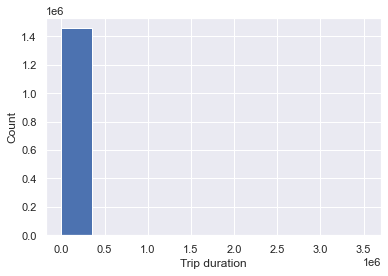

In [8]:
plt.xlabel("Trip duration")
plt.ylabel("Count")
plt.hist(df['trip_duration'])
plt.plot()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Таргет принимает очень большие значения, может на несколько порядков отличаться от остальных признаков, есть выбросы

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

В нашем случае в данных встречаются большие выбросы, мы не хотим на них переобучаться => хотим модель, которая будет штрафовать завышенный прогноз меньше, чем штрафуем заниженный прогноз, а RMSE так не работает

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: По определению распишем MSE для новой модели (с крышечкой)
$$
\frac1l \sum\limits_{i=1}^l (\hat{a}(x_i)-\hat{y}_i)^2 = \frac1l \sum\limits_{i=1}^l (\log{(a(x_i)+1)}-\log{(y_i + 1)})^2
$$
То есть MSE для новой модели и MSLE для исходной модели совпадают. Более того, корень – это монотонная функция, поэтому задача минимизации корня функции и задача минимизации обычной функции являются эквивалентными. То есть минимизация RMSE для новой модели эквивалентна минимизации MSE для новой модели, а она в свою очередь эквивалентна минимизации RMSLE для исходной модели

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

[]

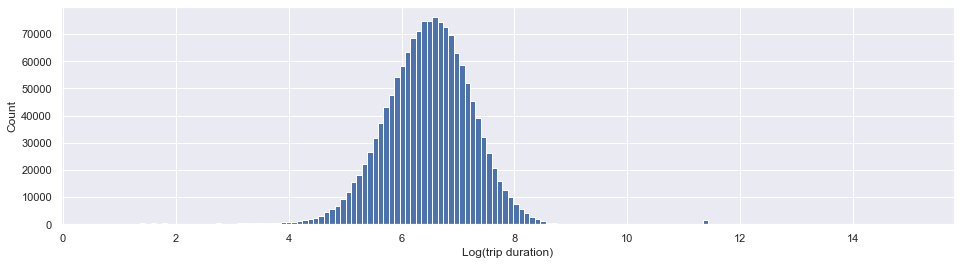

In [9]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
trip_duration = df['trip_duration'] # сохраняю на будущее
df.drop(columns=['trip_duration'], inplace=True)

fig, axs = plt.subplots(figsize=(16, 4))
plt.xlabel("Log(trip duration)")
plt.ylabel("Count")
plt.hist(df['log_trip_duration'].values, bins=150)
plt.plot()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [10]:
from sklearn.metrics import mean_squared_error as mse

best_constant = np.mean(df['log_trip_duration'])
print(best_constant) # похоже на то, что происходит на графике
dummy_pred = np.empty(len(df['log_trip_duration']))
dummy_pred.fill(best_constant)
mse(dummy_pred, df['log_trip_duration'], squared=False)

6.466978409297406


0.7957592365411509

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

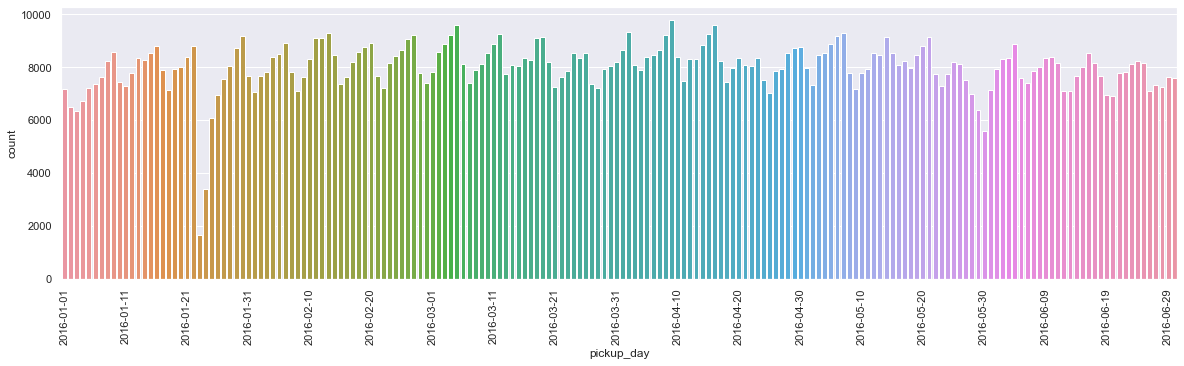

In [11]:
fig, axs = plt.subplots(figsize=(20, 5))
df['pickup_day'] = df['pickup_datetime'].dt.date
labels = sorted(np.unique(df['pickup_day']))[::10]
ticks = np.arange(len(np.unique(df['pickup_day'])))[::10]
plt.xticks(rotation=90)
fig = sns.countplot(x=df['pickup_day'].sort_values())
fig.set(xticks=ticks, xticklabels=labels)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

23 и 24 (в большей степени 23) января 2016 – сильная вьюга в Америке ([January 2016 United States blizzard](https://en.wikipedia.org/wiki/January_2016_United_States_blizzard))

30 мая 2016 – [Memorial Day](https://www.calendardate.com/memorial_day_2016.htm), возможно, были перекрыты какие-то дороги -> было меньше заказов

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

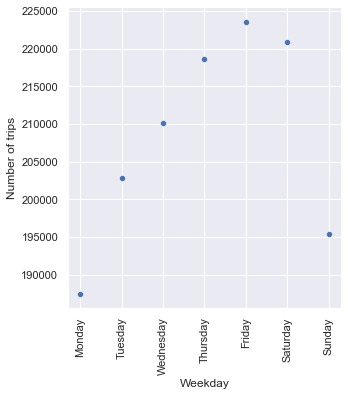

In [12]:
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
y1 = df.groupby('pickup_weekday').count()['id']
ticks = np.arange(7)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig = sns.relplot(x=np.unique(df['pickup_weekday']), y=y1) 
plt.xticks(rotation=90)
fig.set(xticks=ticks, xticklabels=labels, xlabel='Weekday', ylabel='Number of trips')
plt.show()

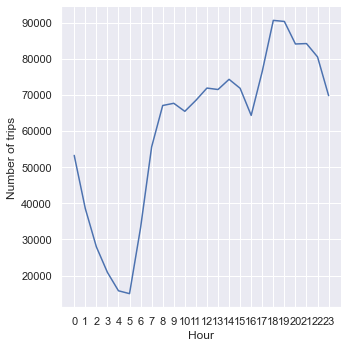

In [13]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
y1 = df.groupby('pickup_hour').count()['id']
ticks = np.arange(24)
fig = sns.relplot(x=np.unique(df['pickup_hour']), y=y1, kind='line') 
fig.set(xticks=ticks, xlabel='Hour', ylabel='Number of trips')
plt.show()

In [14]:
df['pickup_day_of_year'] = df['pickup_datetime'].dt.dayofyear # это пригодится дальше

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   log_trip_duration   1458644 non-null  float64       
 10  pickup_day          1458644 non-null  object        
 11  pickup_weekday      1458644 non-null  int64         
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

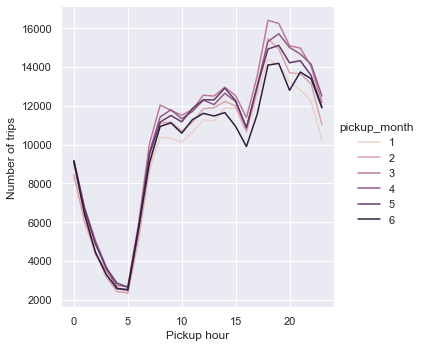

In [16]:
tmp = pd.DataFrame()
tmp['pickup_hour'] = df['pickup_hour']
tmp['pickup_month'] = df['pickup_datetime'].dt.month
tmp['pickup_datetime'] = df['pickup_datetime']

data = tmp.groupby(['pickup_hour', 'pickup_month']).count()
fig = sns.relplot(data=data, x='pickup_hour', y='pickup_datetime', hue='pickup_month', kind='line')  
fig.set(ylabel='Number of trips', xlabel='Pickup hour')
plt.show()

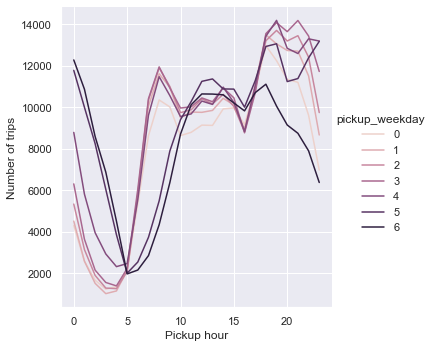

In [17]:
tmp['pickup_weekday'] = df['pickup_weekday']
data = tmp.groupby(['pickup_hour', 'pickup_weekday']).count()
fig = sns.relplot(data=data, x='pickup_hour', y='pickup_datetime', hue='pickup_weekday', kind='line')  
fig.set(ylabel='Number of trips', xlabel='Pickup hour')
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

В марте-апреле вызывают такси в среднем чаще – возможно, из-за дождливой весенней погоды; в июне такси вызывают реже, чем в остальные месяцы – наверное, люди хотят гулять, потому что погода хорошая. На выходных чаще, чем в будние дни, вызывают такси с 00 до 06 – видимо, люди едут домой после вечеринок; при этом по пятницам и субботам количество поездок растёт с 20 до 00 – люди куда-то едут, а во все остальные дни количество поездок с 20 до 00 постепенно падает – люди сидят дома. Ещё в субботу и воскресенье меньше утренних поездок, чем в будние дни – не нужно ехать на работу. 

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [18]:
from sklearn.model_selection import train_test_split

target = df['log_trip_duration']
X = df.copy()
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state=42)

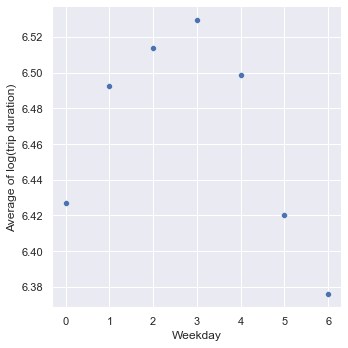

In [19]:
fig1 = sns.relplot(data=X_train.groupby(['pickup_weekday']).mean(), x='pickup_weekday', y='log_trip_duration')
fig1.set(xlabel='Weekday', ylabel='Average of log(trip duration)')
plt.show()

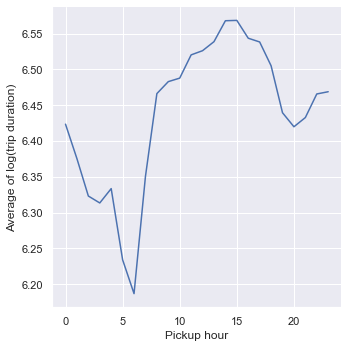

In [20]:
fig1 = sns.relplot(data=X_train.groupby(['pickup_hour']).mean(), x='pickup_hour', y='log_trip_duration', kind='line')
fig1.set(xlabel='Pickup hour', ylabel='Average of log(trip duration)')
plt.show()

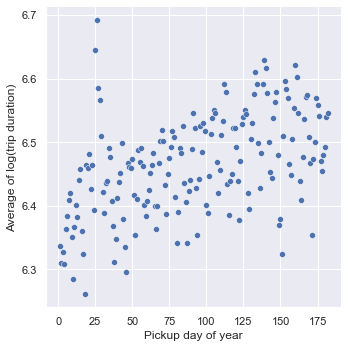

In [21]:
fig1 = sns.relplot(data=X_train.groupby(['pickup_day_of_year']).mean(), x='pickup_day_of_year', y='log_trip_duration')
fig1.set(xlabel='Pickup day of year', ylabel='Average of log(trip duration)')
plt.show()

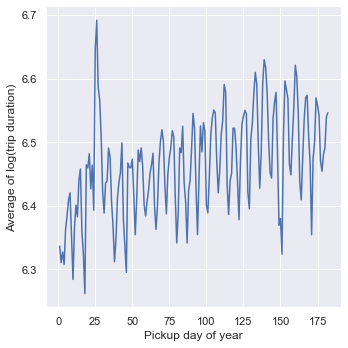

In [22]:
# то же самое, но графиком, а не облаком точек
fig1 = sns.relplot(data=X_train.groupby(['pickup_day_of_year']).mean(), x='pickup_day_of_year', y='log_trip_duration', kind='line')
fig1.set(xlabel='Pickup day of year', ylabel='Average of log(trip duration)')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

График зависимости таргета от дня недели похож на график зависимости количества поездок от дня недели, аналогично график зависимости таргета от часа в сутках очень похож на график завимисости количества поездок от часа в сутках, потому что логарифм таргета +- нормально распределён и чем больше поездок, тем больше в среднем будет и логарифм длины поездок. 

В первый аномальный период средний таргет сильно растёт, это видно на третьем графике, где мы построили зависимость от дня в году. В те дни было очень мало поездок, но видимо они были на большую дистанцию -> люди пытались уехать от метели. Во второй аномальный период было просто мало поездок и все они были короткими.

На последнем графике видно, что таргет в марте-апреле в среднем больше, чем зимой и летом – ранее мы замечали, что в эти месяцы поездок и по количеству было больше.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [23]:
import datetime

# я добавлю всё в df, на трейн и тест разобью ещё раз, я сохраняла random_state
df .loc[:, 'pickup_month'] = df['pickup_datetime'].dt.month
df['is_anomal_1'] = 0
df.loc[(df['pickup_day'] == datetime.date(2016, 1, 23)) | (df['pickup_day'] == datetime.date(2016, 1, 24)), 'is_anomal_1'] = 1
df['is_anomal_2'] = 0
df.loc[df['pickup_day'] == datetime.date(2016, 5, 30), 'is_anomal_2'] = 1
# день недели, час и номер дня в году уже сохраняла

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   log_trip_duration   1458644 non-null  float64       
 10  pickup_day          1458644 non-null  object        
 11  pickup_weekday      1458644 non-null  int64         
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

Как численные признаки для аномалий (уже бинарные), день в году (потому что делать one-hot encoding для ~180 вариантов это страшно), 

Как категориальные -- день поездки, день недели поездки, сам pickup_datetime, месяц поездки, час поездки (наделать 24 новых признака вроде норм), для этих признаков мы будем делать OneHotEncoding, потому что для нас важно, чтобы значения, которые может принимать каждый из этих признаков, весили примерно одинаково (условно, чтобы по дефолту четверг не весил больше понедельника) + некая упорядоченность, которая появится, если пронумеровать значения признаков просто числами от 1 до n, не несет никакой полезной нагрузки

ещё в чат кидали вот [это](https://stats.stackexchange.com/questions/164542/is-time-of-the-day-predictor-in-regression-a-categorical-or-a-continuous-varia), тут написано, что час не является ни категориальным, ни численным признаком (думаю, это экстраполируется и на день недели или час поездки)

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [24]:
# ещё раз разобьём выборку на трейн и тест, у нас же теперь новые признаки, random_state тот же
target = df['log_trip_duration']
X = df.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state=42)

numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month']

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse(y_test, y_pred, squared=False)

0.7881778140408895

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [26]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [27]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [28]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

Аэропорты: John F Kennedy International Airport и LaGuardia Airport

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [29]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df.loc[:, 'haversine'] = haversine_array(df['pickup_latitude'], df['pickup_longitude'], 
                                         df['dropoff_latitude'], df['dropoff_longitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [30]:
df.loc[:, 'log_haversine'] = np.log1p(df['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

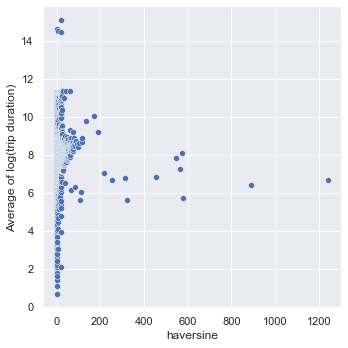

In [31]:
fig1 = sns.relplot(data=df.groupby('haversine').mean(), x='haversine', y='log_trip_duration')
fig1.set(xlabel='haversine', ylabel='Average of log(trip duration)')
plt.show()

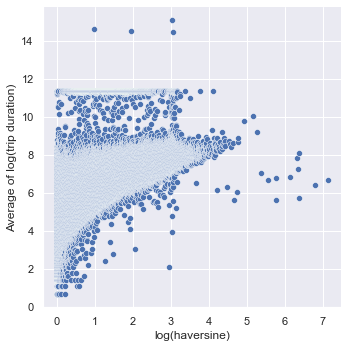

In [32]:
fig1 = sns.relplot(data=df.groupby('log_haversine').mean(), x='log_haversine', y='log_trip_duration')
fig1.set(xlabel='log(haversine)', ylabel='Average of log(trip duration)')
plt.show()

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

[]

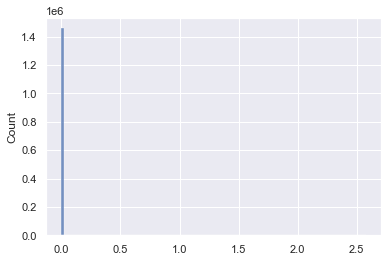

In [33]:
df.loc[:, 'average_velocity'] = np.divide(df['haversine'], trip_duration)

fig = sns.histplot(df['average_velocity'].values, bins=100)
fig.plot()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

[]

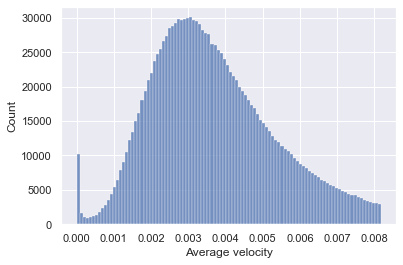

In [34]:
mask_quantile = (df['average_velocity'] < np.quantile(df['average_velocity'], 0.95))
fig = sns.histplot(df[mask_quantile]['average_velocity'], bins=100)
fig.set(xlabel= 'Average velocity')
fig.plot()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

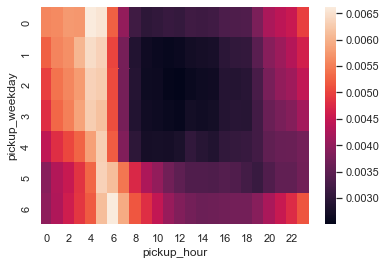

In [35]:
tmp = df.groupby(['pickup_weekday', 'pickup_hour']).median()['average_velocity'].to_frame().reset_index()
tmp = tmp.pivot('pickup_weekday', 'pickup_hour', 'average_velocity')
fig = sns.heatmap(tmp)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения? 
Потому что скорость зависит от trip_duration, а это и есть таргет

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Минимальная скорость в дневное время (с 8 до 16-17) в будние – видимо, в это время много пробок; максимальная же в промежуток с  4 до 6 утра на протяжении всей недели – тогда меньше всего машин независимо от того, будний это день или выходной.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [36]:
mask_traffic = ((df['pickup_hour'] > 8) & (df['pickup_hour'] < 18) & (df['pickup_weekday'] < 5))
mask_free_roads = (((df['pickup_hour'] < 5) & (df['pickup_hour'] > 3) & (df['pickup_weekday'] < 5)) | \
                   ((df['pickup_hour'] < 6) & (df['pickup_hour'] > 4) & (df['pickup_weekday'] > 4)))

df.loc[:, 'trip_traffic'] = 0
df.loc[mask_traffic, 'trip_traffic'] = 1
df.loc[:, 'trip_free_roads'] = 0
df.loc[mask_free_roads, 'trip_free_roads'] = 1

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [37]:
# John F Kennedy International Airport 
kennedy_latitude = 40.641766
kennedy_longitude = -73.780968

# LaGuardia Airport
lg_latitude = 40.776927
lg_longitude = -73.873965

eps = 0.01 # для всех точек посчитаем haversine и посмотрим 

mask_pickup_kennedy = ((np.abs(df['pickup_latitude'] - kennedy_latitude) < eps) & (np.abs(df['pickup_longitude'] - kennedy_longitude) < eps))
mask_dropoff_kennedy = ((np.abs(df['dropoff_latitude'] - kennedy_latitude) < eps) & (np.abs(df['dropoff_longitude'] - kennedy_longitude) < eps))
mask_pickup_lg = ((np.abs(df['pickup_latitude'] - lg_latitude) < eps) & (np.abs(df['pickup_longitude'] - lg_longitude) < eps))
mask_dropoff_lg = ((np.abs(df['dropoff_latitude'] - lg_latitude) < eps) & (np.abs(df['dropoff_longitude'] - lg_longitude) < eps))


df.loc[:, 'is_pickup_kennedy'] = 0
df.loc[:, 'is_dropoff_kennedy'] = 0
df.loc[:, 'is_pickup_newark'] = 0
df.loc[:, 'is_dropoff_newark'] = 0


df.loc[mask_pickup_kennedy, 'is_pickup_kennedy'] = 1
df.loc[mask_dropoff_kennedy, 'is_dropoff_kennedy'] = 1
df.loc[mask_pickup_lg, 'is_pickup_newark'] = 1
df.loc[mask_dropoff_lg, 'is_dropoff_newark'] = 1


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

[]

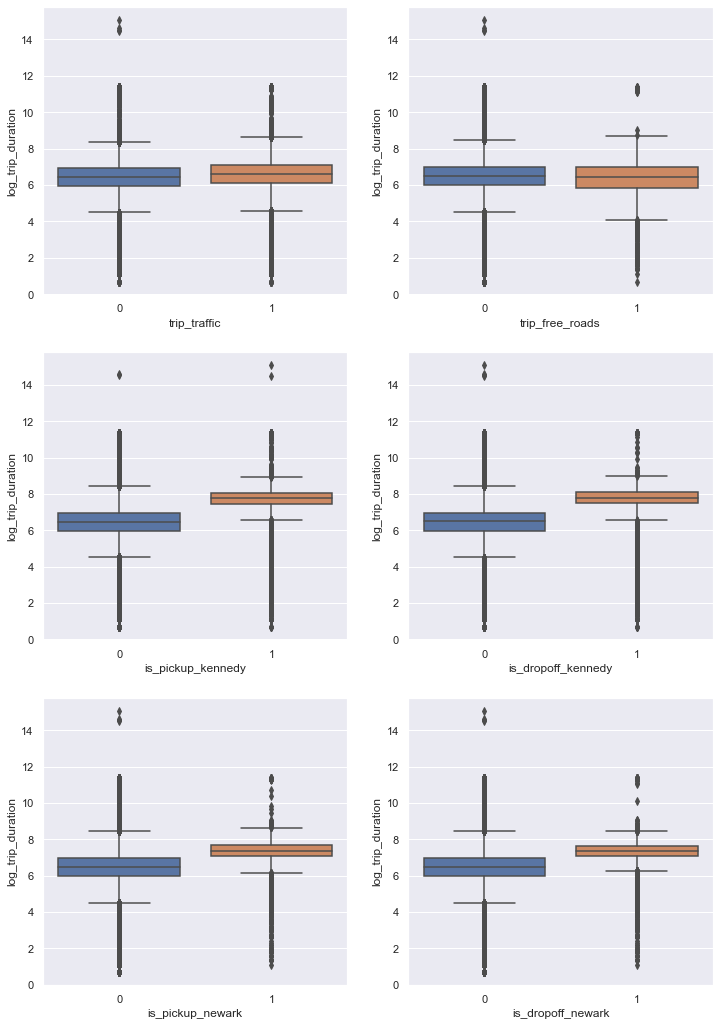

In [38]:
fig, axs = plt.subplots(3, 2, figsize = (12, 18))

sns.boxplot(ax=axs[0, 0], data=df, x='trip_traffic', y='log_trip_duration')
sns.boxplot(ax=axs[0, 1], data=df, x='trip_free_roads', y='log_trip_duration')
sns.boxplot(ax=axs[1, 0], data=df, x='is_pickup_kennedy', y='log_trip_duration')
sns.boxplot(ax=axs[1, 1], data=df, x='is_dropoff_kennedy', y='log_trip_duration')
sns.boxplot(ax=axs[2, 0], data=df, x='is_pickup_newark', y='log_trip_duration')
sns.boxplot(ax=axs[2, 1], data=df, x='is_dropoff_newark', y='log_trip_duration')

plt.plot()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Признаки, связанные с аэропортами, получились хорошими, потому что распределение таргета относительно этих признаков получилось разным, о признаках для пробок и наоборот свободных дорог такого сказать нельзя.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

left_down = (40.704457, -74.018691) # latitude -- по y, longitude -- по x
right_up = (40.745544, -73.971754)
# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ld, ru):
        self.ld = ld
        self.ru = ru
        
    
    def show_map(self):
        m = folium.Map([(self.ld[0] + self.ru[0]) / 2, (self.ld[1] + self.ru[1]) / 2], zoom_start=12)
        folium.vector_layers.Rectangle((self.ld, self.ru)).add_to(m)

        lu = (self.ru[0], self.ld[1])
        rd = (self.ld[0], self.ru[1])
        vertical = 3
        horizontal = 4
        for i in range(1, horizontal):
            left = ((lu[0] - self.ld[0]) * i / horizontal + self.ld[0], self.ld[1])
            right = ((lu[0] - self.ld[0]) * i / horizontal + self.ld[0], self.ru[1])

            folium.PolyLine([left, right], weight=2).add_to(m)
            
        for i in range(1, vertical):
            lower = (self.ld[0], self.ld[1] + (rd[1] - self.ld[1]) * i / vertical)
            upper = (lu[0], self.ld[1] + (rd[1] - self.ld[1]) * i / vertical)

            folium.PolyLine([lower, upper], weight=2).add_to(m)
            
        return m
        
    
    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        data = X.copy()
        data.loc[:, 'pickup_square_number'] = 0
        data.loc[:, 'dropoff_square_number'] = 0
        
        lu = (self.ru[0], self.ld[1])
        rd = (self.ld[0], self.ru[1])
        vertical = 3
        horizontal = 4
        for i in range(1, horizontal + 1):
            for j in range(1, vertical + 1):
#                 print("square number", (i - 1) * 3 + j - 1)
                lower_latitude = (lu[0] - self.ld[0]) * (i - 1) / horizontal + self.ld[0]

                
                upper_latitude = (lu[0] - self.ld[0]) * i / horizontal + self.ld[0]

                
                
                left_longitude =  self.ld[1] + (rd[1] - self.ld[1]) * (j - 1) / vertical

                
                right_longitude = self.ld[1] + (rd[1] - self.ld[1]) * j / vertical
                
                
                mask_pickup_latitude = (data['pickup_latitude'] >= lower_latitude) & (data['pickup_latitude'] < upper_latitude)
                mask_pickup_longitude = (data['pickup_longitude'] >= left_longitude) & \
                                    (data['pickup_longitude'] < right_longitude)
                data.loc[mask_pickup_latitude & mask_pickup_longitude, 'pickup_square_number'] = (i - 1) * 3 + j
#                 print(len(data.loc[mask_pickup_latitude & mask_pickup_longitude, :]))
                
                
                mask_dropoff_latitude = (data['dropoff_latitude'] >= lower_latitude) & (data['dropoff_latitude'] < upper_latitude)
                mask_dropoff_longitude = (data['dropoff_longitude'] >= left_longitude) & \
                                    (data['dropoff_longitude'] < right_longitude)
                data.loc[mask_dropoff_latitude & mask_dropoff_longitude, 'dropoff_square_number'] = (i - 1) * 3 + j
#                 print(len(data.loc[mask_dropoff_latitude & mask_dropoff_longitude, :]))
        
        return data
    
mgt = MapGridTransformer(left_down, right_up)
mgt.show_map()

tmp = mgt.transform(df)
tmp['pickup_square_number'].value_counts()

0     1002037
11      87591
8       78988
12      66427
5       49746
1       37322
9       36150
10      31862
4       29649
7       21767
6       13336
2        3393
3         376
Name: pickup_square_number, dtype: int64

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [40]:
X = df.copy()
target = df['log_trip_duration']
X = X.drop(columns = ['average_velocity', 'log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state=42)

X_train_transformed = mgt.transform(X_train)
X_test_transformed = mgt.transform(X_test)

numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 'trip_traffic', 'trip_free_roads',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark','is_dropoff_newark', 'log_haversine']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
mse(y_test, y_pred, squared=False)

0.4880499707670067

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [41]:
df['vendor_id'].value_counts() # 2 значения

2    780302
1    678342
Name: vendor_id, dtype: int64

In [42]:
df['passenger_count'].value_counts() # 10 значений

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [43]:
df['store_and_fwd_flag'].value_counts() # 2 значения

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

[]

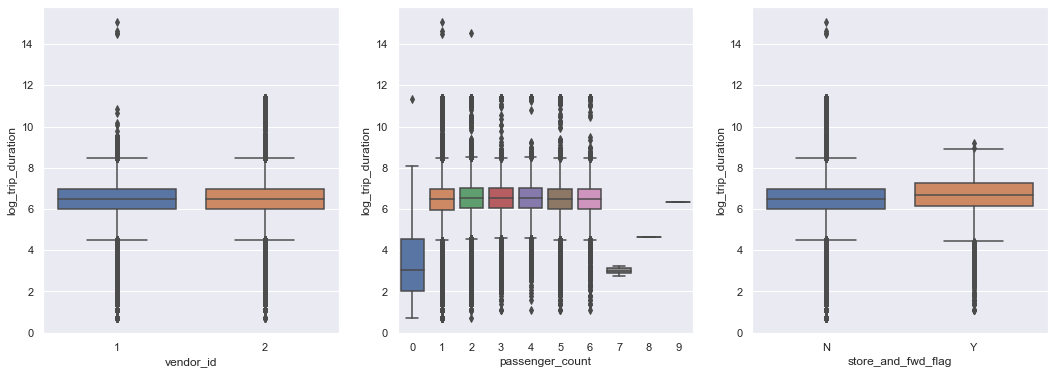

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axs[0], data=df, x='vendor_id', y='log_trip_duration')
sns.boxplot(ax=axs[1], data=df, x='passenger_count', y='log_trip_duration')
sns.boxplot(ax=axs[2], data=df, x='store_and_fwd_flag', y='log_trip_duration')

plt.plot()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [45]:
df.loc[:, 'vendor_id'] = df['vendor_id'] - 1
df.loc[df['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0
df.loc[df['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1

print(df['vendor_id'].value_counts())
print(df['store_and_fwd_flag'].value_counts())

1    780302
0    678342
Name: vendor_id, dtype: int64
0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Среднее одинаковое, разные только усы – возможно, признаки будут не очень сильными, посмотрим, обучив далее модель

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [46]:
X = df.copy()
target = df['log_trip_duration']
X = X.drop(columns = ['average_velocity', 'log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state=42)

X_train_transformed = mgt.transform(X_train)
X_test_transformed = mgt.transform(X_test)

numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 'vendor_id', 
                    'store_and_fwd_flag', 'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 'is_dropoff_newark']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
mse(y_test, y_pred, squared=False)


0.48769906486735476

RMSE упала совсем незначительно, так что можем и дропнуть

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [47]:
df = df.drop(columns=['vendor_id', 'store_and_fwd_flag'])

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [48]:
X = df.copy()
target = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state=42)
# average_velocity и log_trip_duration дропнем потом
print(X_train.shape[0])
to_drop = X_train[X_train['haversine'] == 0].index
X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)
print(X_train.shape[0])

to_drop = X_train[X_train['log_trip_duration'] < 0.2].index
X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)
print(X_train.shape[0])

to_drop = X_train[X_train['log_haversine'] > np.quantile(X_train['log_haversine'], 0.995)].index
X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)
print(X_train.shape[0])

1021050
1016940
1016940
1011855


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [49]:
X_train['passenger_count'].value_counts() 
# пометим 0, 7 и 8 как редкую категорию

1    717326
2    145946
5     54065
3     41559
6     33342
4     19580
0        35
8         1
7         1
Name: passenger_count, dtype: int64

In [50]:
X_train['is_rare'] = 0
train_mask_strange_passenger_count = (X_train['passenger_count'] == 0) | (X_train['passenger_count'] == 7) | (X_train['passenger_count'] == 8)
X_train.loc[train_mask_strange_passenger_count, 'is_rare'] = 1
X_train.loc[X_train['is_anomal_1'] == 1, 'is_rare'] = 1
X_train.loc[X_train['is_anomal_2'] == 1, 'is_rare'] = 1
X_train.loc[X_train['trip_free_roads'] == 1, 'is_rare'] = 1


X_test['is_rare'] = 0
test_mask_strange_passenger_count = (X_test['passenger_count'] == 0) | (X_test['passenger_count'] == 7) | (X_test['passenger_count'] == 8)
X_test.loc[test_mask_strange_passenger_count, 'is_rare'] = 1
X_test.loc[X_test['is_anomal_1'] == 1, 'is_rare'] = 1
X_test.loc[X_test['is_anomal_2'] == 1, 'is_rare'] = 1
X_test.loc[X_test['trip_free_roads'] == 1, 'is_rare'] = 1

# да за шо оно ругается


<ipython-input-50-979f4f20f595>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['is_rare'] = 0
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [51]:
columns_to_drop = ['average_velocity', 'log_trip_duration']

X_train_transformed = mgt.transform(X_train.drop(columns=columns_to_drop))
X_test_transformed = mgt.transform(X_test.drop(columns=columns_to_drop))

numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 
                    'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 
                    'is_dropoff_newark', 'is_rare']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
mse(y_test, y_pred, squared=False)

0.48768859076082494

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [52]:
print(X_train.shape) # до OneHot-кодирования
print("Вообще-то признаков {} + 2, ещё признаки, которые добавляет MapGridTransformer".format(X_train.shape[1]))


X_train_transformed = mgt.transform(X_train)
X_test_transformed = mgt.transform(X_test)

categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count']
numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 
                    'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 
                    'is_dropoff_newark', 'is_rare']
 
enc = OneHotEncoder()
print("Признаков после OneHotEncoding: {}".format(enc.fit_transform(X_train_transformed[categorical_features]).shape[1] + len(numeric_features)) )

(1011855, 25)
Вообще-то признаков 25 + 2, ещё признаки, которые добавляет MapGridTransformer
Признаков после OneHotEncoding: 83


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [53]:
from sklearn.linear_model import Lasso

columns_to_drop = ['average_velocity', 'log_trip_duration']
X_train_transformed = mgt.transform(X_train.drop(columns=columns_to_drop))
X_test_transformed = mgt.transform(X_test.drop(columns=columns_to_drop))

numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 
                    'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 
                    'is_dropoff_newark', 'is_rare']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
mse(y_test, y_pred, squared=False)

0.7950292024000832

Ridge намного лучше

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [54]:
columns_to_drop = ['id', 'average_velocity', 'log_trip_duration']

X_train_transformed = mgt.transform(X_train.drop(columns=columns_to_drop))

X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=43)

Best alpha = 6.9519


Text(0, 0.5, 'CV score')

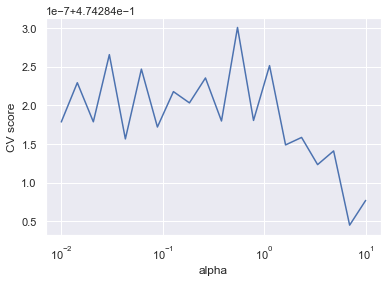

In [64]:
numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 
                    'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 
                    'is_dropoff_newark', 'is_rare']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

alphas = np.logspace(-2, 1, 20)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_valid, y_valid)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")


Best alpha = 0.0010


Text(0, 0.5, 'CV score')

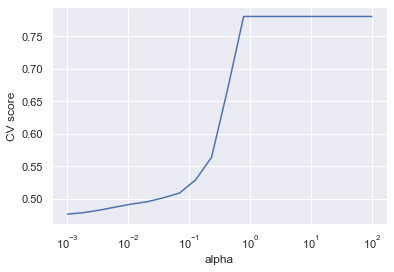

In [56]:
numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 
                    'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 
                    'is_dropoff_newark', 'is_rare']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

alphas = np.logspace(-3, 2, 20)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_valid, y_valid)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

Text(0, 0.5, 'zero weights')

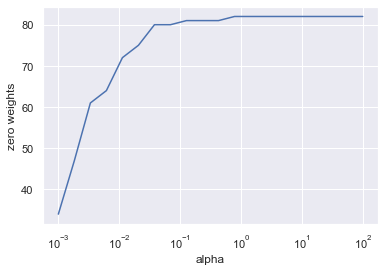

In [57]:
numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 
                    'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 
                    'is_dropoff_newark', 'is_rare']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

alphas = np.logspace(-3, 2, 20)
zero_weights_per_alpha = []
rmse_per_alpha = []
# не умею такое делать через GridSearchCV, придётся руками
for alpha in alphas:
    pipeline = Pipeline([
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha))
    ])
    model = pipeline.fit(X_train_train, y_train_train)
    prediction = model.predict(X_valid)
    rmse = mse(y_valid, prediction, squared=False)
    rmse_per_alpha.append(rmse)
#     Lasso - последний шаг в пайплайне, поэтому -1
    zero_weights = np.sum(pipeline.steps[-1][-1].coef_ == 0)
    zero_weights_per_alpha.append(zero_weights)
    


plt.plot(alphas, zero_weights_per_alpha)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("zero weights")

Видим, что половина признаков пропала уже при левой границе альфы (это же значение было помечено как best_alpha) - надо уменьшить нижнюю и верхнюю границы перебора

In [58]:
columns_to_drop = ['average_velocity', 'log_trip_duration']
X_train_transformed = mgt.transform(X_train.drop(columns=columns_to_drop))
X_test_transformed = mgt.transform(X_test.drop(columns=columns_to_drop))

numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 
                    'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 
                    'is_dropoff_newark', 'is_rare']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(0.001))
])

model = pipeline.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
mse(y_test, y_pred, squared=False)

0.48940082722202366

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Потому что модель линейная, а признак (ячейка начала; ячейка конца) нелинейно зависит от ячейки начала и ячейки конца 

In [60]:
def get_frequent_pairs(df):
    df_frequent_pairs = (df.groupby(["pickup_square_number", 
                                                      "dropoff_square_number"]).count().sort_values(by='pickup_datetime', 
                                                                        ascending=False)[:100]).reset_index()
    df.loc[:, 'frequent_pair'] = -1
    frequent_pairs = list(zip(df_frequent_pairs['pickup_square_number'], df_frequent_pairs['dropoff_square_number']))
    for i, pair in enumerate(frequent_pairs):
        pickup, dropoff = pair[0], pair[1]
        mask_frequent_pair = ((df['pickup_square_number'] == pickup) & (df['dropoff_square_number'] == dropoff))
        df.loc[mask_frequent_pair, 'frequent_pair'] = i
    


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [65]:
best_alpha = 6.9519

columns_to_drop = ['average_velocity', 'log_trip_duration']

X_train_transformed = mgt.transform(X_train.drop(columns=columns_to_drop))
X_test_transformed = mgt.transform(X_test.drop(columns=columns_to_drop))

get_frequent_pairs(X_train_transformed)
get_frequent_pairs(X_test_transformed)


numeric_features = ['is_anomal_1', 'is_anomal_2', 'pickup_day_of_year', 
                    'trip_traffic', 'trip_free_roads', 'log_haversine',
                   'is_pickup_kennedy', 'is_dropoff_kennedy', 'is_pickup_newark', 
                    'is_dropoff_newark', 'is_rare']
categorical_features = ['pickup_weekday', 'pickup_hour', 'pickup_month', 
                        'pickup_square_number', 'dropoff_square_number', 
                       'passenger_count', 'frequent_pair']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])


pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

pipeline.fit(X_train_transformed, y_train)
pred = pipeline.predict(X_test_transformed)
mse(pred, y_test, squared=False)

0.4877221363654653

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

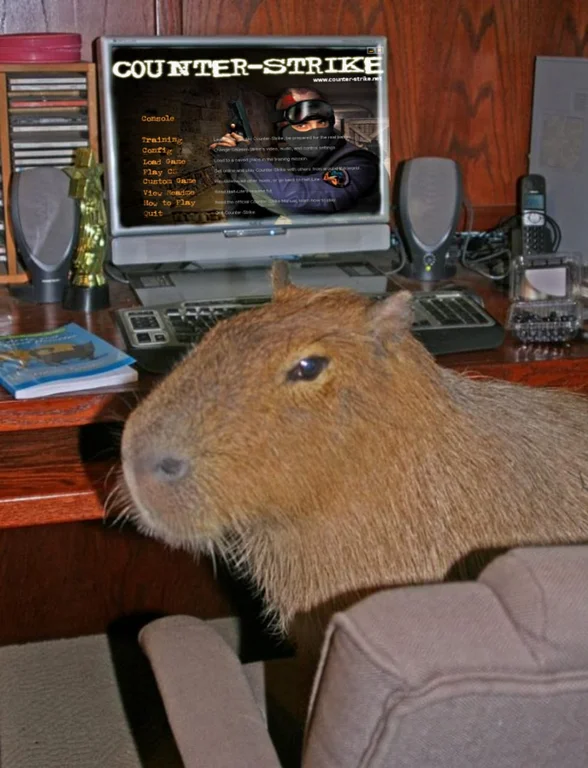